Here I am going to apply Principal component analysis on the given dataset using Scikit-learn and find out the dimensions(also known as components) with maximum variance(where the data is spread out).Features with little variance in the data are then projected into new lower dimension. Then the models are  trained on transformed dataset to apply machine learning models.Then I have applied  Random forest Regressor on old and the transformed datasets and compared them.
If you want to know the basic concept behind Principal Component Analysis check this out.
(https://www.kaggle.com/nirajvermafcb/d/ludobenistant/hr-analytics/principal-component-analysis-explained)

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('wine.csv') #Replace it with your path where the data file is stored
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']


In [6]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


df.corr() compute pairwise correlation of columns.Correlation shows how the two variables are related to each other.Positive values shows as one variable increases other variable increases as well. Negative values shows as one variable increases other variable decreases.Bigger the values,more strongly two varibles are correlated and viceversa.

In [7]:
df.corr()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


Text(0.5, 1.0, 'Correlation between different fearures')

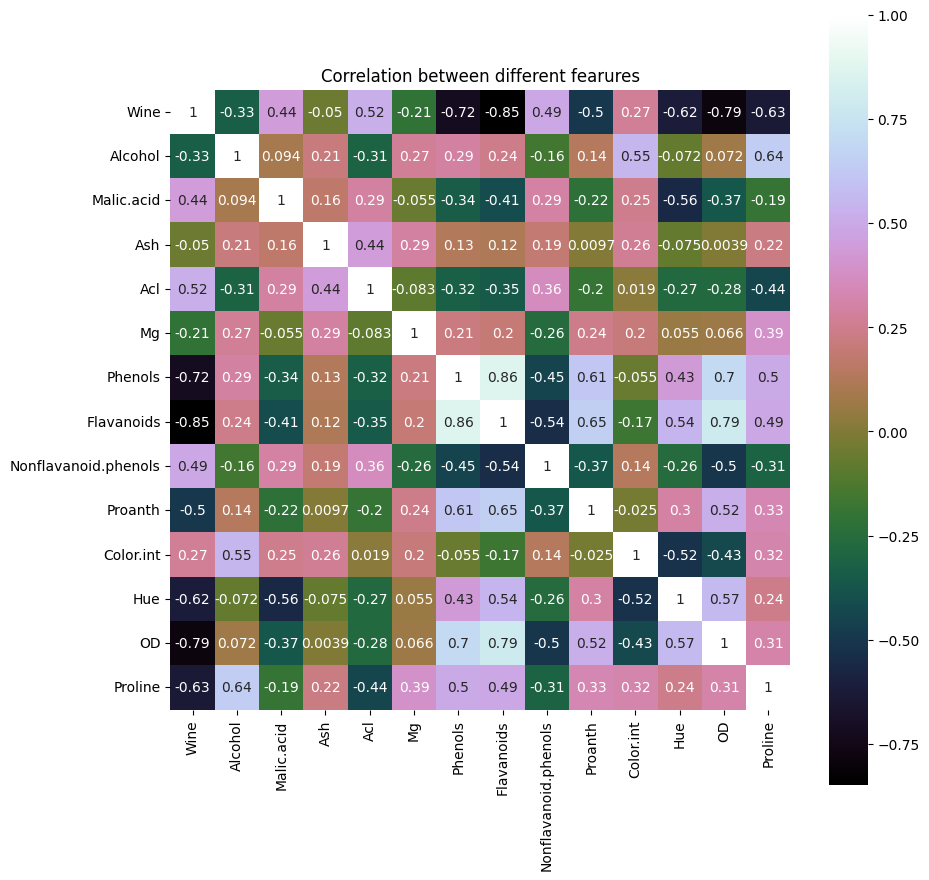

In [9]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

# Doing some visualisation before moving onto PCA

In [15]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [16]:
df['Alcohol'].unique()

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39, 13.3 ,
       13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48, 13.28,
       13.07, 14.22, 13.56, 13.41, 13.88, 14.21, 13.9 , 13.94, 13.82,
       13.77, 13.74, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67, 12.17,
       13.11, 13.34, 12.21, 12.29, 13.49, 12.99, 11.96, 11.66, 13.03,
       11.84, 12.7 , 12.  , 12.72, 12.08, 12.67, 12.16, 11.65, 11.64,
       12.69, 11.62, 12.47, 11.81, 12.6 , 12.34, 11.82, 12.51, 12.42,
       12.25, 12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 11.03, 12.77,
       11.45, 11.56, 11.87, 12.07, 12.43, 11.79, 12.04, 12.86, 12.88,
       12.81, 12.53, 12.84, 13.36, 13.52, 13.62, 12.87, 13.32, 13.08,
       12.79, 13.23, 12.58, 13.17, 13.84, 12.45, 14.34, 12.36, 13.69,
       12.96, 13.78, 13.45, 12.82, 13.4 , 12.2 , 14.16, 13.27, 14.13])

Here we are printing all the unique values in sales columns

In [19]:
wine=df.groupby('Wine').sum()
wine

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,,,,,,,,,,,,,
1,810.94,118.63,144.88,1005.2,6274,167.57,175.96,17.11,112.06,326.170000,62.660,186.31,65827
2,871.79,137.22,159.38,1436.9,6713,160.38,147.74,25.82,115.75,219.150000,74.996,197.76,36885
3,631.38,160.02,116.98,1028.0,4767,80.58,37.51,21.48,55.37,355.019999,32.770,80.81,30235


In [20]:
groupby_wine=df.groupby('Wine').mean()
groupby_wine

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [21]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']


Let us find if there is any relationship between temperature and apparent_temperature

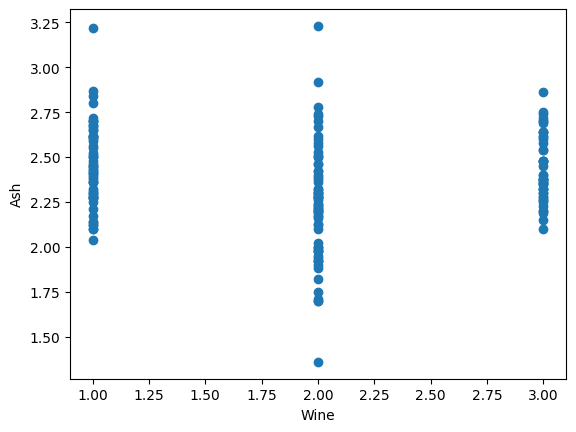

In [35]:
f1,f2 = "Wine","Ash"
x=df[f1]
y=df[f2]
colors=('r','b')
plt.xlabel(f1)
plt.ylabel(f2)
plt.scatter(x,y)

In [36]:
X = df.iloc[:,1:13]  # all rows, all the features and no labels
y = df.iloc[:, 0]  # all rows, label only
#X
#y

In [37]:
df.corr()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


Text(0.5, 1.0, 'Correlation between different fearures')

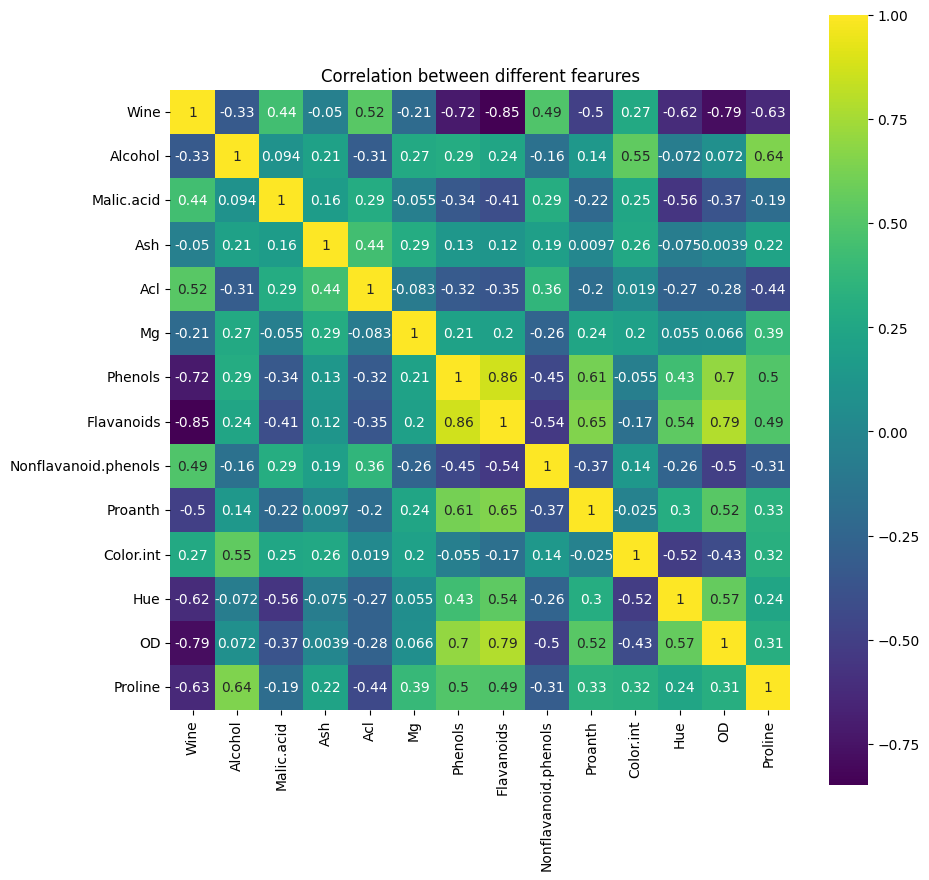

In [38]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

Standardising data

In [39]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.25171685,
         0.36217728,  1.84791957],
       [ 0.24628963, -0.49941338, -0.82799632, ..., -0.29332133,
         0.40605066,  1.1134493 ],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.26901965,
         0.31830389,  0.78858745],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ...,  2.22423597,
        -1.61212515, -1.48544548],
       [ 0.20923168,  0.22769377,  0.01273209, ...,  1.83492299,
        -1.56825176, -1.40069891],
       [ 1.39508604,  1.58316512,  1.36520822, ...,  1.79166599,
        -1.52437837, -1.42894777]])

In [40]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-2.99074115e+00,  1.79015155e+00, -4.11513784e-01, ...,
         8.82844047e-01,  4.93160575e-01, -5.69344617e-02],
       [-2.02609080e+00, -4.99051191e-01, -1.93457916e+00, ...,
         2.92021422e-01,  3.90288316e-01,  3.13720368e-03],
       [-2.13933414e+00,  1.14948636e+00,  8.89924725e-01, ...,
         5.96519953e-01,  3.17612270e-02,  1.34407707e-02],
       ...,
       [ 3.10986008e+00,  2.21384410e+00, -1.13410236e+00, ...,
        -4.63860511e-01,  7.35672975e-01,  6.85419270e-02],
       [ 2.77210151e+00,  1.75972405e+00, -6.40917710e-01, ...,
         1.99270656e-01,  3.69696675e-01, -2.55438754e-02],
       [ 3.42189511e+00,  2.59860682e+00,  7.50412483e-01, ...,
        -1.73070818e-01, -2.39992917e-01, -3.14761357e-01]])

In [41]:
pca.get_covariance()

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684],
       [ 0.29073446, -0.3370606 ,  0.12970824, -0.32292752,  0.21561254,
         1.00564972,  

In [42]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.36632969, 0.18127473, 0.11829747, 0.07398949, 0.06798447,
       0.05266292, 0.04565687, 0.0288938 , 0.02162794, 0.02053873,
       0.01412537, 0.00861851])

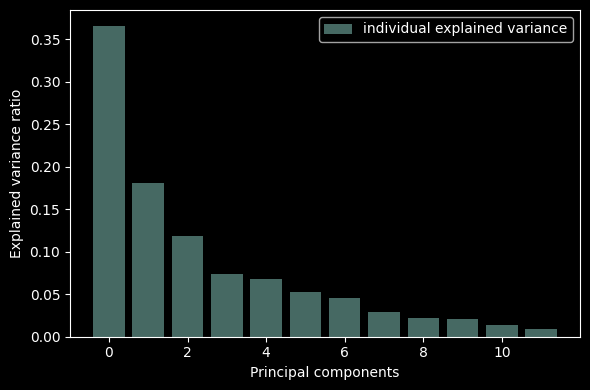

In [44]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(12), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

**Thus we can see from the above plot that  first six components constitute almost 55% of the variance.Third,fourth and fifth components has 42% of the data sprad.The last component has less than 5% of the variance.Hence we can drop the fifth component  **

In [45]:
pca=PCA(n_components=6)
X_new=pca.fit_transform(X)
X_new

array([[-2.99074115,  1.79015155, -0.41151378,  0.66975647,  0.25045517,
        -0.2995793 ],
       [-2.0260908 , -0.49905119, -1.93457916,  0.12827221, -0.32452582,
        -0.97573765],
       [-2.13933414,  1.14948636,  0.88992473, -0.81094137,  0.24685353,
         0.72497334],
       ...,
       [ 3.10986008,  2.2138441 , -1.13410236,  0.43036158,  1.14079586,
         0.40481633],
       [ 2.77210151,  1.75972405, -0.64091771,  1.07761387,  0.2043171 ,
         1.19540229],
       [ 3.42189511,  2.59860682,  0.75041248, -0.83306494, -0.74148401,
         0.14990353]])

In [46]:
pca.get_covariance()

array([[ 1.00269859e+00,  8.51589768e-02,  2.19984651e-01,
        -3.22528566e-01,  2.74697128e-01,  3.09449658e-01,
         2.47550277e-01, -1.50862430e-01,  1.28886884e-01,
         5.29050052e-01, -1.00258388e-01,  5.88165558e-02],
       [ 8.51589768e-02,  9.61342278e-01,  1.76913798e-01,
         3.26530940e-01, -9.28423318e-02, -3.36589289e-01,
        -4.02539552e-01,  2.25906947e-01, -2.63140500e-01,
         2.87473299e-01, -5.89090949e-01, -3.63951626e-01],
       [ 2.19984651e-01,  1.76913798e-01,  1.01137132e+00,
         4.31741418e-01,  2.93104488e-01,  1.31358768e-01,
         9.13040174e-02,  1.99161953e-01,  3.28179575e-02,
         2.45979620e-01, -6.22976764e-02,  9.17361604e-04],
       [-3.22528566e-01,  3.26530940e-01,  4.31741418e-01,
         9.72491251e-01, -4.74211693e-02, -3.13967172e-01,
        -3.39185186e-01,  4.26109376e-01, -1.86282068e-01,
        -7.67511122e-04, -2.66497845e-01, -2.82842263e-01],
       [ 2.74697128e-01, -9.28423318e-02,  2.9310448

In [47]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.36632969, 0.18127473, 0.11829747, 0.07398949, 0.06798447,
       0.05266292])

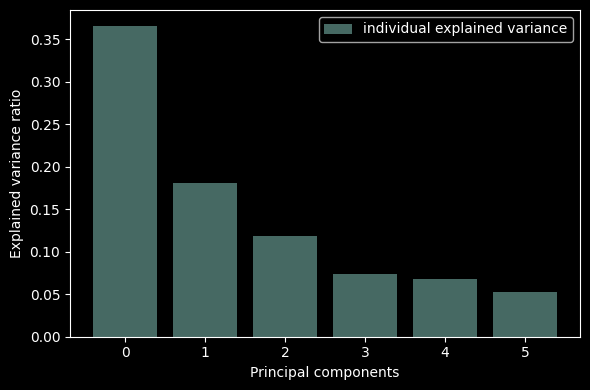

In [49]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(6), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(142, 12)

In [51]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [52]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)    

[0.9887920298879203, 0.9704109589041096, 0.9606973848069739, 0.960912204234122, 0.9590236612702366, 0.9643088418430884, 0.9609413678298219, 0.9659768057285181, 0.9663650200636502, 0.9673713574097136, 0.9661574879326492, 0.9605292652552927, 0.9622404150117533, 0.9631143416270618, 0.9624448318804483, 0.9661466765255293, 0.9640522780059207, 0.9622111526221115, 0.9621139563203085]


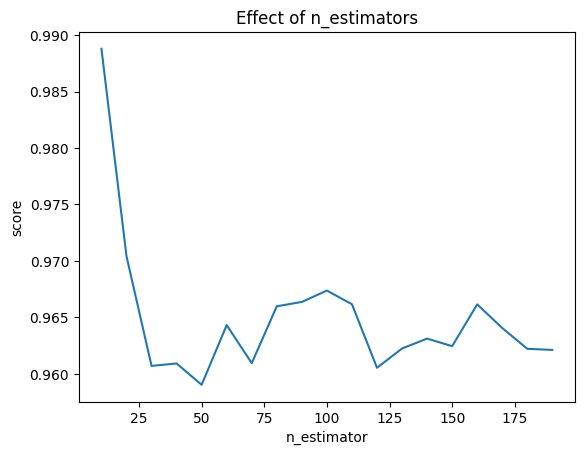

In [53]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9647887323943662 %
Test score before PCA 0.9722222222222222 %


# PCA

In [70]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y,test_size=0.2, random_state=1)
X_train_new.shape

(142, 6)

In [71]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [72]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train_new, y_train)
    scores.append(model.score(X_test_new, y_test))
print(scores)    

[0.7417683686176837, 0.8077833125778331, 0.8401494396014945, 0.8955977584059776, 0.8616667496886675, 0.8188169364881694, 0.8713691005667522, 0.7982145080946451, 0.851578801715788, 0.8262585305105854, 0.8538517748525674, 0.8153393524283935, 0.8347587080990664, 0.8334472767936565, 0.8343252801992528, 0.8310521092777086, 0.809714263553198, 0.824270098242701, 0.8297021901939748]


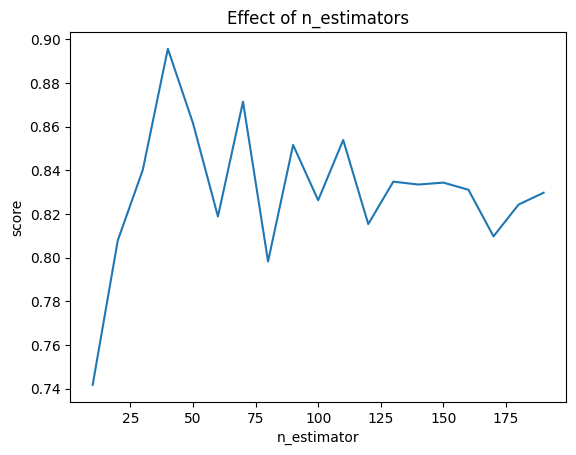

In [73]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [74]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9647887323943662 %
Test score after PCA 0.9722222222222222 %


You can find my notebook on Github:
("https://github.com/nirajvermafcb/Data-Science-with-python")
https://www.kaggle.com/code/nirajvermafcb/principal-component-analysis-explained/notebook